# Quick overview of the libraries needed and the shape of the data

In [304]:
# First: import typical datascience stack

#numpy and pandas for data manipulation

import numpy as pd
import pandas as pd

#sklearn preprocessing for dealing with categorical variables  

from sklearn.preprocessing import LabelEncoder

#File system management

import os

#Suppress warnings 

import warnings 
warnings.filterwarnings('ignore')

#import matplotlib and seaborn for plotting

import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
#To list all input files

print(os.listdir('../input/'))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [306]:
#Load training data

app_train = pd.read_csv('../input/application_train.csv')
print("Shape of the training data: ", app_train.shape)
app_train.head()

Shape of the training data:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [307]:
#Same for test data

app_test = pd.read_csv('../input/application_test.csv')
print("Shape of the test data: ", app_test.shape)
app_test.head()

Shape of the test data:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis (EDA)

## Examine the Distribution of the Target Column

In [308]:
#Count the number of 0 and the number of 1
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

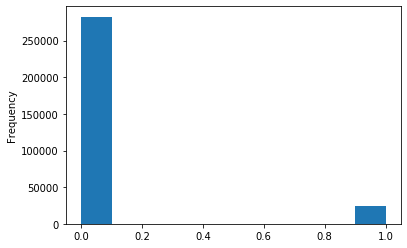

In [309]:
#Plot the target to highlight imbalanced class problem

app_train['TARGET'].plot.hist();

#Note: some people use app_train['TARGET'].astype(int).plot.hist(); but I don't know why since it is already int as dtype (see above)

## Examine Missing Values

In [310]:
#Table with the number of missing values (and its percentage) AND in descending order

def missing_values_table(df):
    #Total Missing Value
    mis_val = df.isnull().sum()
    
    #Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    
    #Concatenate the 2 frame
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)
    
    #Rename the columns 
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Missing values', 1: '% of total values'})
    mis_val_table_ren_columns.index.name = 'Field'
    
    #Descending order
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of total values', ascending = False).round(1)
    
    #Printing some information
    print("Your selected dataframes has " + str(df.shape[1]) + " columns.\n"
                                              "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missings values.")
    #return the dataframe with missing values
    return mis_val_table_ren_columns

In [311]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframes has 122 columns.
There are 67 columns that have missings values.


,Missing values,% of total values
Field,,
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4


## Column types

In [312]:
# Number of each types of column. Object are categorical variable

app_train.dtypes.value_counts()

#without value_counts it will display dtypes for each columns

float64    65
int64      41
object     16
dtype: int64

In [313]:
# For each object column, the number of unique classes

app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## Encoding Categorical Variables

### Label encoding

In [314]:
# Label encoding is needed when there are less than 2 unique categories OR when there is an order between the values

le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        # If there are less than 2 unique categories:
        if len(list(app_train[col].unique())) <= 2:
            # Train on training data
            le.fit(app_train[col])
            # Transforme training and test data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            le_count += 1
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


### One-hot Encoding

In [315]:
# One-hot encoding

app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


## Aligning training and test data

In [316]:
# We must have the same columns between the 2 dataset. First we save the target, then we align, finally we add target column
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes

app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Re-add the target column
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


## Anomalies

In [317]:
# To display anomalies, we can use describe:

(app_train['DAYS_BIRTH'] / -365).describe() # The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application.


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [318]:
app_train['DAYS_EMPLOYED'].describe() # It seems to have strange numbers...need to investigate with plot

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

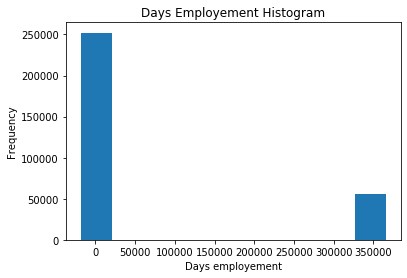

In [319]:
# plot a histogram to investifate the anomaly above

app_train['DAYS_EMPLOYED'].plot.hist(title = "Days Employement Histogram");
plt.xlabel('Days employement'); # ';' eliminate a useless line